In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sn
from scipy.io import loadmat

In [4]:
def read_HSI():
    X=loadmat('Salinas.mat')['salinas']
    y= loadmat('Salinas_gt.mat')['salinas_gt']
    print("X shape :{}\ny shape: {}".format(X.shape,y.shape))
    return X,y

X,y=read_HSI()
          

X shape :(512, 217, 224)
y shape: (512, 217)


In [5]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band216,band217,band218,band219,band220,band221,band222,band223,band224,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,109,93,54,79,54,36,11,17,10,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,111,96,56,83,56,36,11,15,16,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,107,89,54,81,54,30,11,11,12,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,105,85,56,75,50,30,11,19,8,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,105,83,48,75,50,24,9,17,6,0


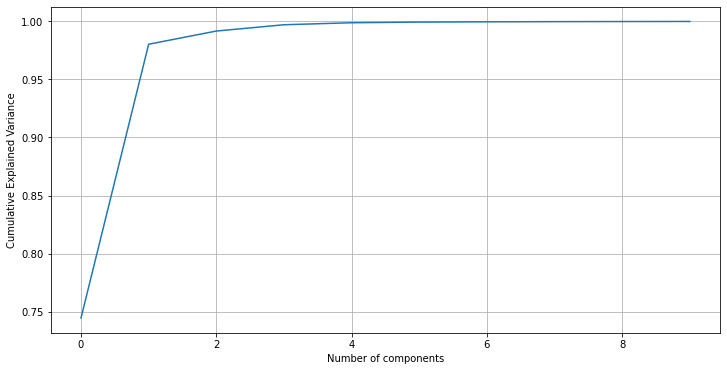

In [7]:
from sklearn.decomposition import PCA
pca= PCA(n_components=10)
principalComponents= pca.fit_transform(df.iloc[:,:-1].values)
evr = pca.explained_variance_ratio_
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(evr))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [8]:
pca= PCA(n_components=3)
dt= pca.fit_transform(df.iloc[:,:-1].values)
q= pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range(1,4)]+['class']
q.head()

,PC-1,PC-2,PC-3,class
0,-6136.372785,-4385.713859,628.407429,0
1,-6196.949170,-4360.645841,568.280593,0
2,-6359.503632,-4693.939578,578.031043,0
3,-6583.650265,-5104.045527,630.452788,0
4,-6834.580193,-5385.693551,666.843917,0


In [9]:
q['class'].unique()

array([ 0,  6,  7,  4,  5, 15,  8,  3,  2,  1, 11, 12, 13, 14, 10,  9, 16],
      dtype=uint8)

In [15]:

names=[
      'Brocoli_green_weeds_1',
'Brocoli_green_weeds_2',
'Fallow',
'Fallow_rough_plow',
'Fallow_smooth',
'Stubble',
'Celery', 
'Grapes_untrained',
'Soil_vinyard_develop',
'Corn_senesced_green_weeds',
'Lettuce_romaine_4wk',
'Lettuce_romaine_5wk',
'Lettuce_romaine_6wk',
'Lettuce_romaine_7wk',
'Vinyard_untrained', 
'Vinyard_vertical_trellis', ]

In [11]:
x= q[q['class']!=0]
X=x.iloc[:,:-1].values
y=x.loc[:,'class'].values


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
svm=SVC (C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

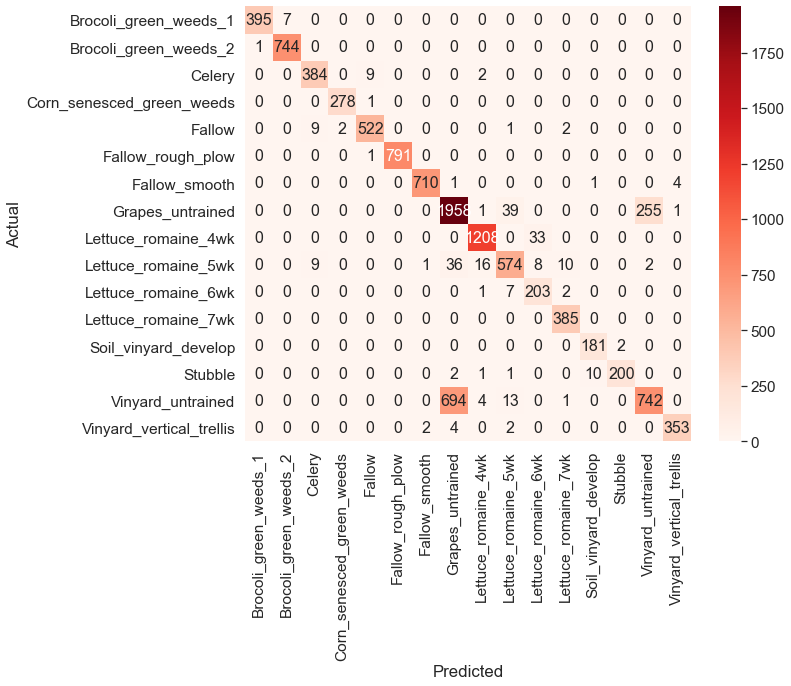

In [16]:
data=confusion_matrix (y_test,ypred)
df_cm=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [17]:
print(classification_report(y_test,ypred,target_names=names))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      0.98      0.99       402
    Brocoli_green_weeds_2       0.99      1.00      0.99       745
                   Fallow       0.96      0.97      0.96       395
        Fallow_rough_plow       0.99      1.00      0.99       279
            Fallow_smooth       0.98      0.97      0.98       536
                  Stubble       1.00      1.00      1.00       792
                   Celery       1.00      0.99      0.99       716
         Grapes_untrained       0.73      0.87      0.79      2254
     Soil_vinyard_develop       0.98      0.97      0.98      1241
Corn_senesced_green_weeds       0.90      0.88      0.89       656
      Lettuce_romaine_4wk       0.83      0.95      0.89       213
      Lettuce_romaine_5wk       0.96      1.00      0.98       385
      Lettuce_romaine_6wk       0.94      0.99      0.97       183
      Lettuce_romaine_7wk       0.99      0.93      0.96     